<a href="https://colab.research.google.com/github/vinit6085903/anpr/blob/main/AI_Based_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/walmart-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'walmart-dataset' dataset.
Path to dataset files: /kaggle/input/walmart-dataset


In [2]:
import os
print(os.listdir(path))

['Walmart.csv']


In [3]:
import pandas as pd
file_path = os.path.join(path, "Walmart.csv")
df = pd.read_csv(file_path)

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [6]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [7]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

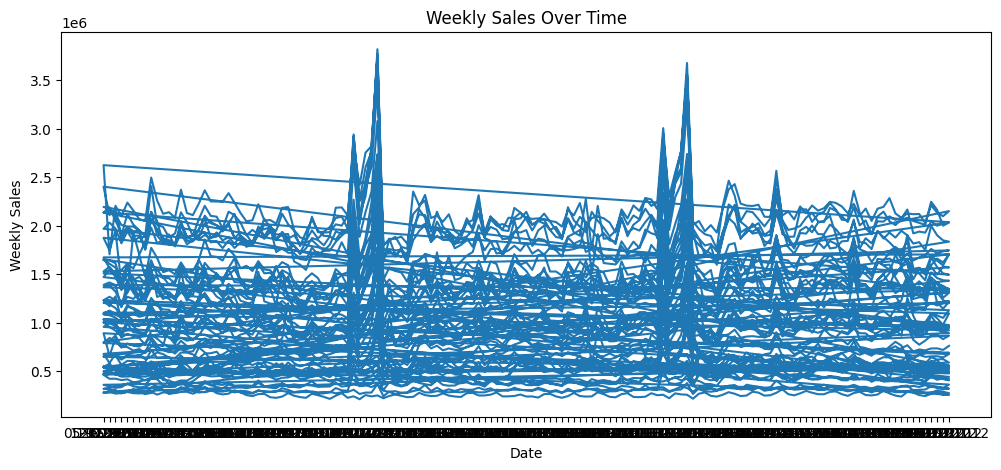

In [9]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Weekly_Sales'])
plt.title("Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()


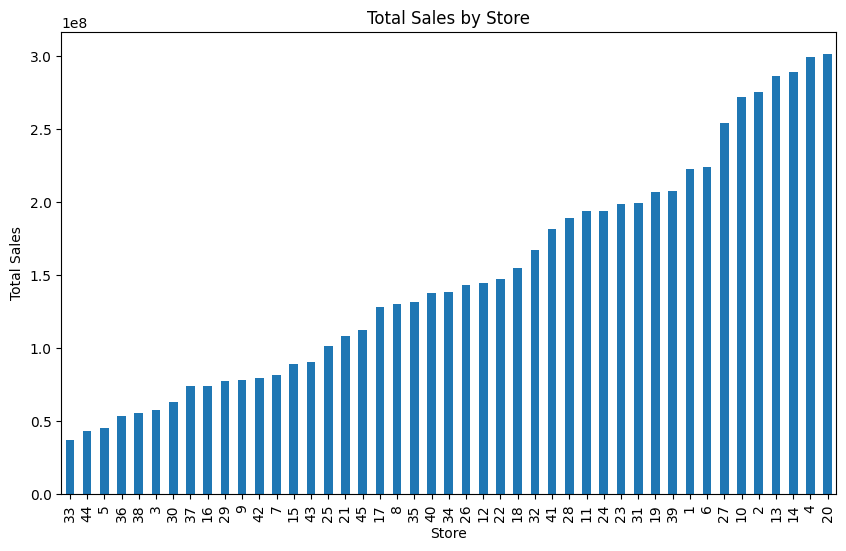

In [10]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values()

plt.figure(figsize=(10,6))
store_sales.plot(kind='bar')
plt.title("Total Sales by Store")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.show()


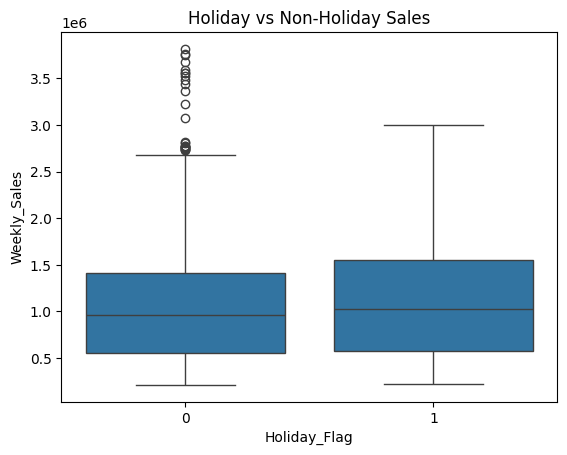

In [11]:
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title("Holiday vs Non-Holiday Sales")
plt.show()


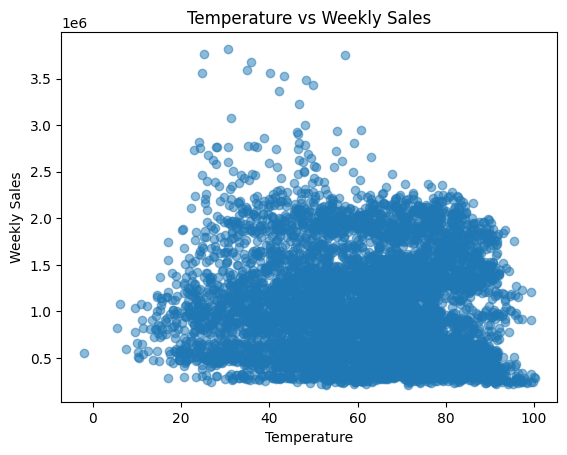

In [12]:
plt.scatter(df['Temperature'], df['Weekly_Sales'], alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.title("Temperature vs Weekly Sales")
plt.show()


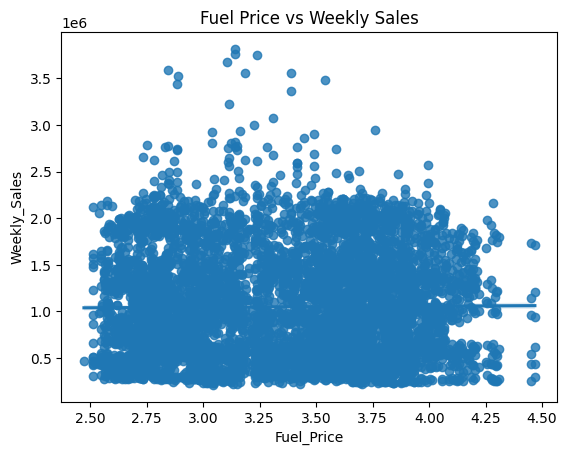

In [13]:
sns.regplot(x='Fuel_Price', y='Weekly_Sales', data=df)
plt.title("Fuel Price vs Weekly Sales")
plt.show()


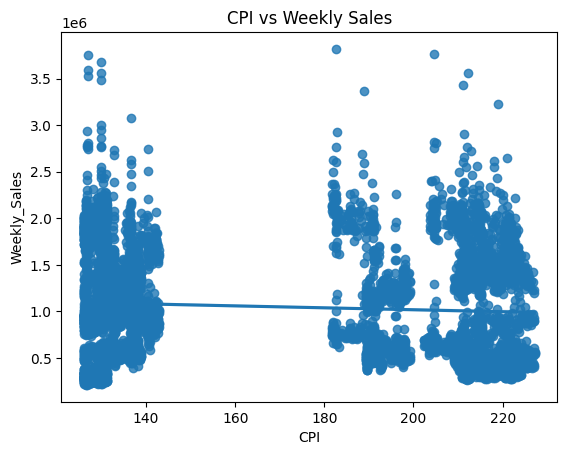

In [14]:
sns.regplot(x='CPI', y='Weekly_Sales', data=df)
plt.title("CPI vs Weekly Sales")
plt.show()


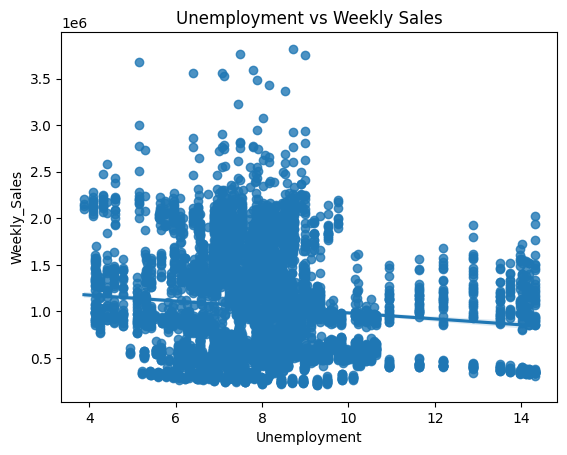

In [15]:
sns.regplot(x='Unemployment', y='Weekly_Sales', data=df)
plt.title("Unemployment vs Weekly Sales")
plt.show()


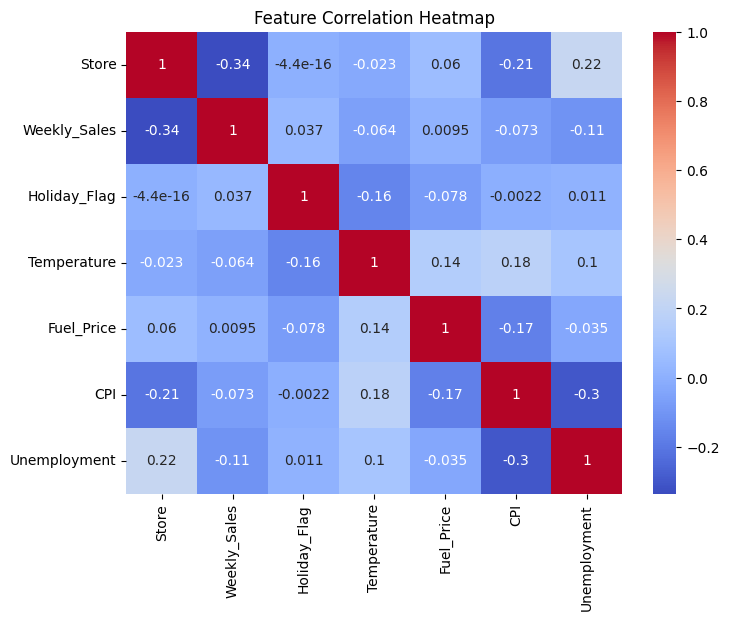

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


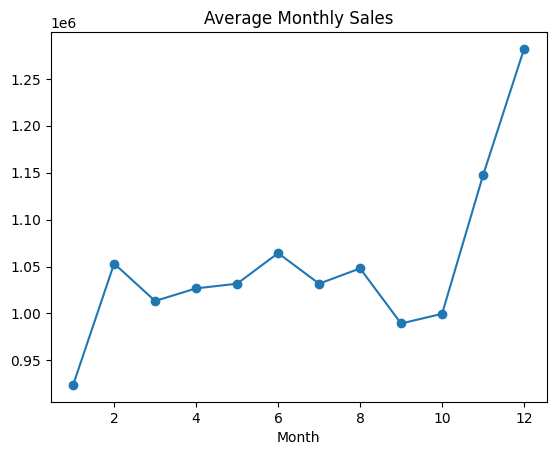

In [19]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

monthly_sales.plot(kind='line', marker='o')
plt.title("Average Monthly Sales")
plt.show()

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

# Time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)

# Drop Date (model direct use nahi karta)
df = df.drop(columns=['Date'])

df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9


In [21]:
X = df.drop('Weekly_Sales', axis=1)
y = df['Weekly_Sales']


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))


Linear Regression R2: 0.1555316049960288
MAE: 432594.97688780207


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


Random Forest R2: 0.9602061998867268
MAE: 61806.08693304893


In [26]:
train_pred = rf.predict(X_train)

print("Train R2:", r2_score(y_train, train_pred))
print("Test  R2:", r2_score(y_test, y_pred))


Train R2: 0.9935256206448688
Test  R2: 0.9602061998867268


Store           0.667925
CPI             0.154274
Unemployment    0.101297
Week            0.049623
Temperature     0.012266
Fuel_Price      0.009599
Month           0.002789
Holiday_Flag    0.001537
Year            0.000690
dtype: float64


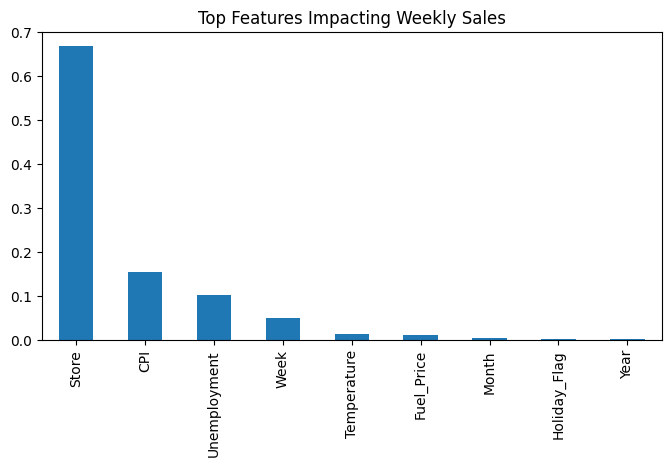

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

feat_imp = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(feat_imp.head(10))

feat_imp.head(10).plot(kind='bar', figsize=(8,4))
plt.title("Top Features Impacting Weekly Sales")
plt.show()


In [28]:
import pandas as pd

def predict_weekly_sales(
    model,
    X_columns,
    Store,
    Holiday_Flag,
    Temperature,
    Fuel_Price,
    CPI,
    Unemployment,
    Year,
    Month,
    Week
):
    """
    Predict Walmart Weekly Sales
    """


    input_data = {
        "Holiday_Flag": Holiday_Flag,
        "Temperature": Temperature,
        "Fuel_Price": Fuel_Price,
        "CPI": CPI,
        "Unemployment": Unemployment,
        "Year": Year,
        "Month": Month,
        "Week": Week
    }

    for col in X_columns:
        if col.startswith("Store_"):
            input_data[col] = 0

    store_col = f"Store_{Store}"
    if store_col in X_columns:
        input_data[store_col] = 1

    input_df = pd.DataFrame([input_data])
    input_df = input_df.reindex(columns=X_columns, fill_value=0)


    prediction = model.predict(input_df)

    return float(prediction[0])


In [29]:
predicted_sales = predict_weekly_sales(
    model=rf,
    X_columns=X.columns,
    Store=1,
    Holiday_Flag=0,
    Temperature=25.0,
    Fuel_Price=3.5,
    CPI=220.0,
    Unemployment=7.5,
    Year=2012,
    Month=11,
    Week=45
)

print("Predicted Weekly Sales:", predicted_sales)


Predicted Weekly Sales: 1601124.171069444


In [30]:
for m in [6, 7, 11, 12]:
    pred = predict_weekly_sales(
        rf, X.columns,
        Store=1,
        Holiday_Flag=1 if m in [11,12] else 0,
        Temperature=20,
        Fuel_Price=3.5,
        CPI=220,
        Unemployment=7.5,
        Year=2012,
        Month=m,
        Week=45
    )
    print(f"Month {m} → Predicted Sales: {int(pred)}")


Month 6 → Predicted Sales: 1592303
Month 7 → Predicted Sales: 1592142
Month 11 → Predicted Sales: 1637111
Month 12 → Predicted Sales: 1639171


<Axes: >

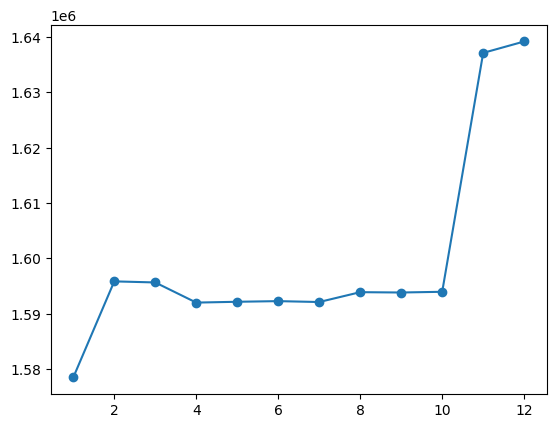

In [31]:
monthly_pred = {}
for m in range(1, 13):
    monthly_pred[m] = predict_weekly_sales(
        rf, X.columns,
        Store=1,
        Holiday_Flag=1 if m in [11,12] else 0,
        Temperature=20,
        Fuel_Price=3.5,
        CPI=220,
        Unemployment=7.5,
        Year=2012,
        Month=m,
        Week=45
    )

pd.Series(monthly_pred).plot(kind='line', marker='o')
